In [25]:
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
import pandas as pd
import re
from os import path
from PIL import Image
from TweetsCleaning import filter_tweet
from LoadData import loaddata
get_ipython().run_line_magic('config', "InlineBackend.figure_format = 'retina'")

In [26]:
AirPods_df = loaddata('AirPods')
iPhone_df = loaddata('iPhone')
Watch_df = loaddata('Watch')
iPad_df = loaddata('iPad')

In [24]:
def cleandf(df):
    pattern1 = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    pattern2 = re.compile('RT @:?(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    
    clean = df.text.apply(lambda x: pattern1.sub('', x))
    clean = clean.apply(lambda x: pattern2.sub('', x))
    clean = pd.DataFrame(clean)
    
    return clean

def get_sentiment(df):
    
    cleaned = cleandf(df)
    cleaned['polarity'] = cleaned.apply(lambda x: TextBlob(x['text']).sentiment.polarity, axis=1)
    cleaned['subjectivity'] = cleaned.apply(lambda x: TextBlob(x['text']).sentiment.subjectivity, axis=1)
    text = " ".join(text for text in cleaned.text)
    
    def color_func(word, *args, **kargs):
        sentiment = cleaned.loc[cleaned.text.str.contains(word),'polarity'].mean()
        if sentiment < 0.00:
                colors = 'red'
        elif sentiment > 0.00:
                colors = 'green'
        else:
                colors = 'grey'
        return colors

    # Load mask image
    #twitter_mask = np.array(Image.open("./TwitterLogo.png"))

    # Create a word cloud image
    wordcloud = WordCloud(background_color="white",
                          font_path = 'CabinSketch-Bold.ttf',
                          max_words=300
                          #mask= twitter_mask
                          ).generate(text)

    #image_colors = ImageColorGenerator(twitter_mask)

    # Show word cloud
    plt.imshow(wordcloud.recolor(color_func=color_func))
    plt.axis("off")
    plt.gcf().set_size_inches(10.5, 10.5)

    #plt.savefig('../output/' + name + 'Sentiment.png', dpi=300)
    plt.show()


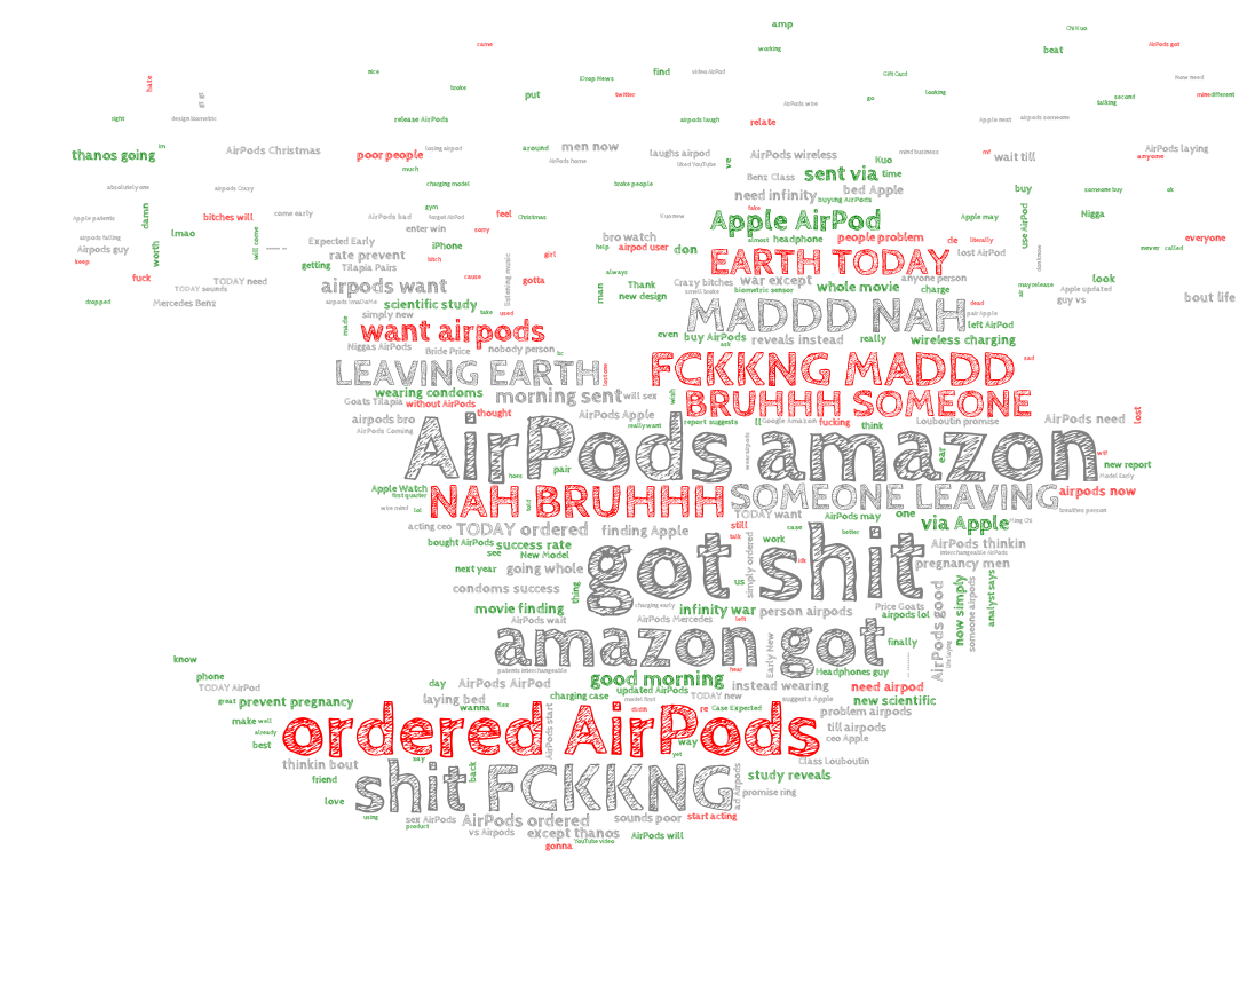

In [20]:
get_sentiment(AirPods_df)

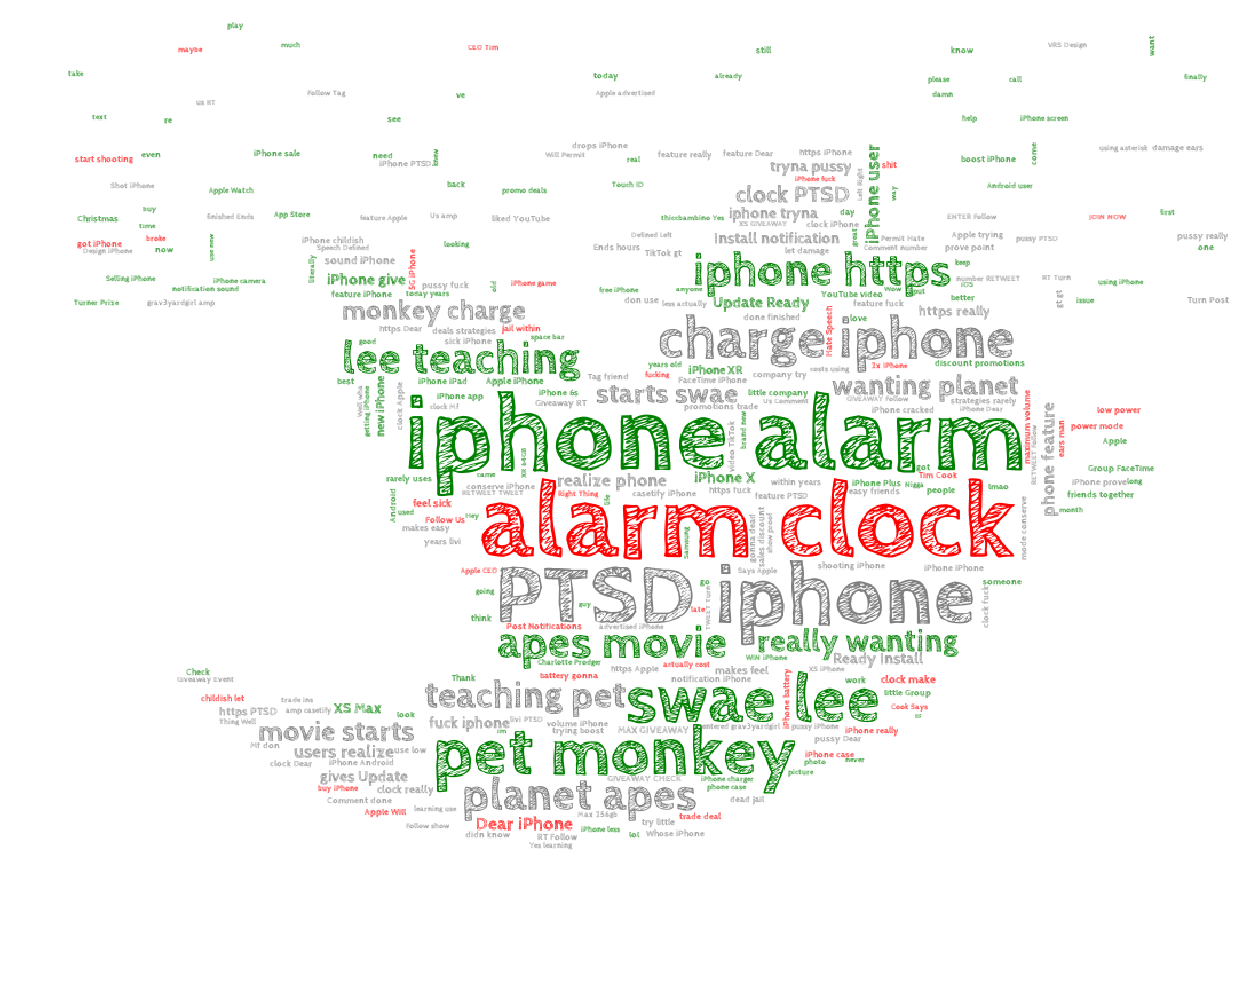

In [21]:
get_sentiment(iPhone_df)

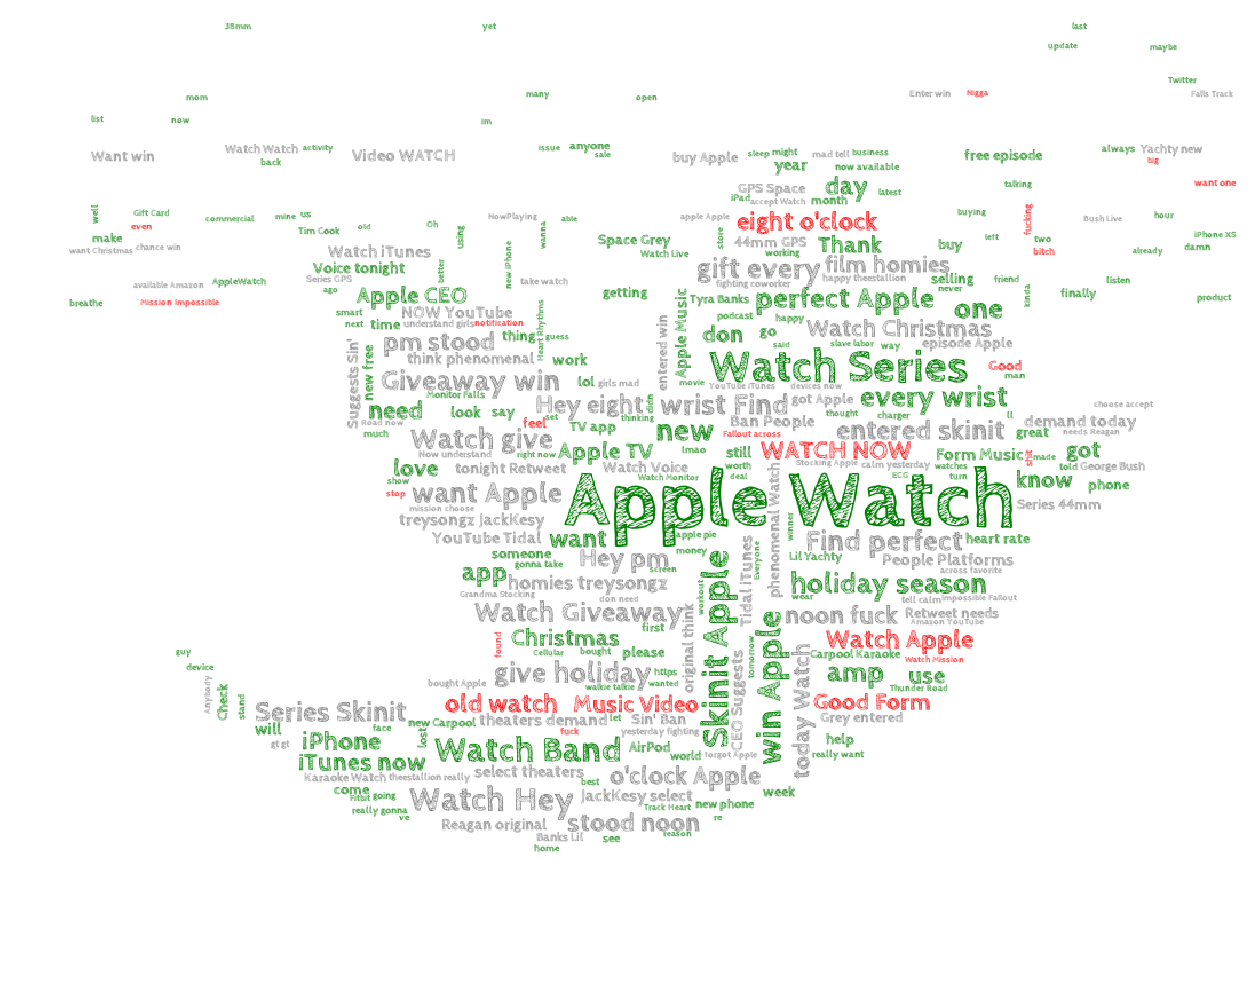

In [22]:
get_sentiment(Watch_df)

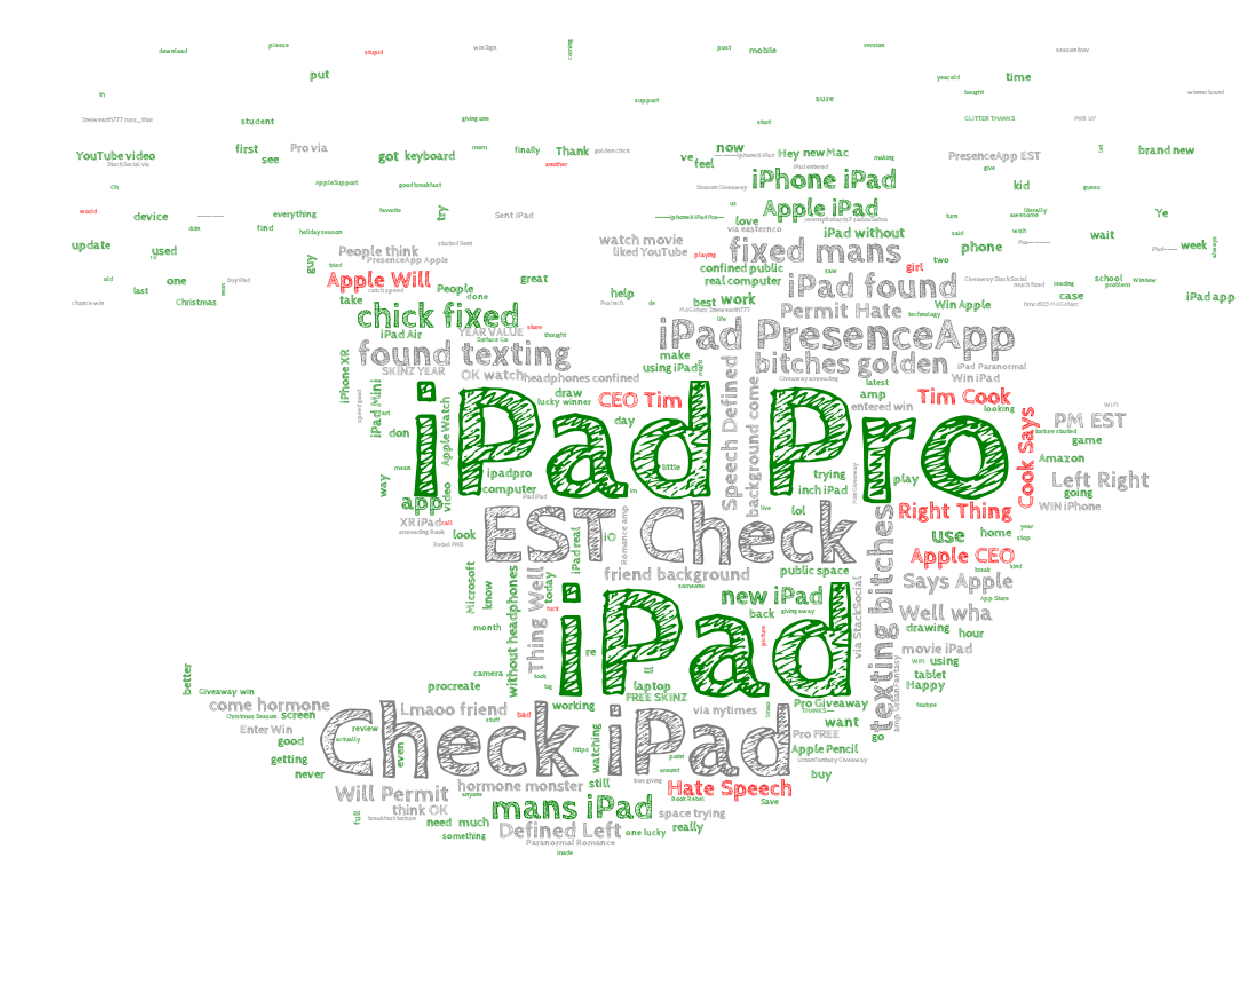

In [23]:
get_sentiment(iPad_df)